In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from scipy.stats import uniform 
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\SVM\SVM\mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [8]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [9]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [10]:
# Select a feature to plot (e.g., 'cap-shape')
feature = 'cap_shape'


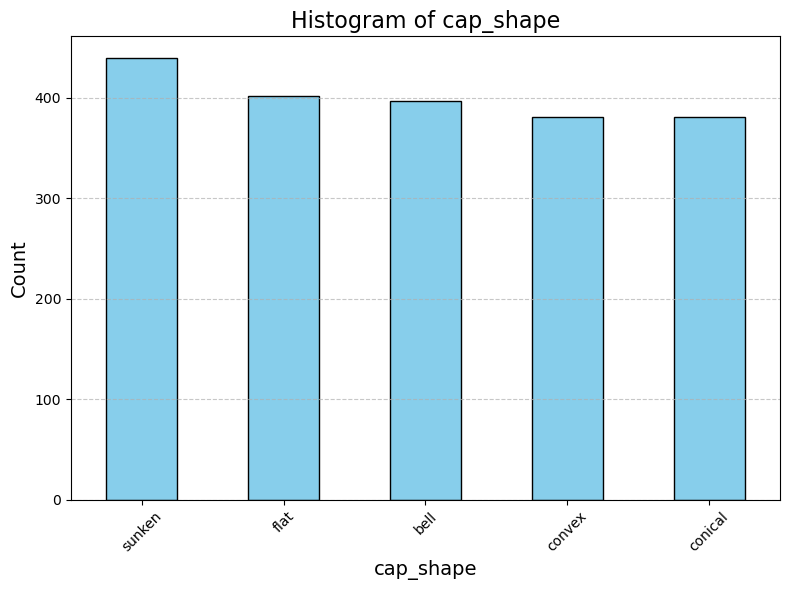

In [11]:

# Plot the histogram
plt.figure(figsize=(8, 6))
df[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Histogram of {feature}", fontsize=16)
plt.xlabel(feature, fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Encode categorical features to numeric
label_encoders = {col: LabelEncoder() for col in df.columns}
for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])

In [13]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [14]:
df.dtypes

Unnamed: 0                  int64
cap_shape                   int32
cap_surface                 int32
cap_color                   int32
bruises                     int32
odor                        int32
gill_attachment             int32
gill_spacing                int32
gill_size                   int32
gill_color                  int32
stalk_shape                 int32
stalk_root                  int32
stalk_surface_above_ring    int32
stalk_surface_below_ring    int32
stalk_color_above_ring      int32
stalk_color_below_ring      int32
veil_type                   int32
veil_color                  int32
ring_number                 int32
ring_type                   int32
spore_print_color           int32
population                  int32
habitat                     int32
class                       int32
stalk_height                int64
cap_diameter                int64
dtype: object

In [15]:

# Split data into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']  # Assuming 'class' is the target column


In [16]:
# Step 3: Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_pca = pca.fit_transform(df)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [3.52944924e-01 3.28793242e-01 3.17962407e-01 4.86939139e-05
 3.31072174e-05 2.87737385e-05 2.74565469e-05 2.59731327e-05
 2.47241388e-05 2.16151546e-05]


In [17]:
# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [18]:

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Step 4: Train an SVM model
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [20]:
# Step 5: Evaluate the model
y_pred = svm_model.predict(X_test)

In [21]:
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")


In [22]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.6925133689839572
Recall: 0.9700374531835206
F1-Score: 0.8081123244929798

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.14      0.23       133
           1       0.69      0.97      0.81       267

    accuracy                           0.69       400
   macro avg       0.69      0.55      0.52       400
weighted avg       0.69      0.69      0.61       400



In [25]:

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 10),         # Random values between 0.1 and 10
    'gamma': ['scale', 'auto'],    # Values for the gamma parameter
    'kernel': ['linear', 'rbf', 'poly']  # Different kernel types
}



In [26]:
# Step 2: Initialize the SVM model
svm_model = SVC(random_state=42)


In [27]:

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=10,           # Number of random combinations to test
    scoring='accuracy',  # Optimize for accuracy
    cv=3,                # 3-fold cross-validation
    verbose=2,           # Increase verbosity for progress
    random_state=42,     # For reproducibility
    n_jobs=-1            # Use all available CPU cores
)

In [28]:

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E96B6A2A80>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy', verbose=2)

In [29]:

# Output the best hyperparameters found by RandomizedSearchCV
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'C': 6.274815096277165, 'gamma': 'auto', 'kernel': 'rbf'}


In [33]:
# Ensure that RandomizedSearchCV has been run and the best model is stored
best_model = random_search.best_estimator_



In [34]:
accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.4f}")


Test set accuracy: 0.8000


In [35]:

# Predict on the test set
y_pred = best_model.predict(X_test)



In [36]:
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.60      0.67       133
           1       0.82      0.90      0.86       267

    accuracy                           0.80       400
   macro avg       0.78      0.75      0.76       400
weighted avg       0.80      0.80      0.79       400

